In [22]:
from engine import Atom
from nn import Mod, Neuron, Layer, MLP
from utils import draw_dot

In [23]:
x1 = Atom(2.0, label='x1')
x2 = Atom(0.0, label='x2')
w1 = Atom(-3.0, label='w1')
w2 = Atom(1.0, label='w2')
b = Atom(6.8814, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b
n.label = 'n'

o = n.tanh()
o.label = 'o'
o.backward()

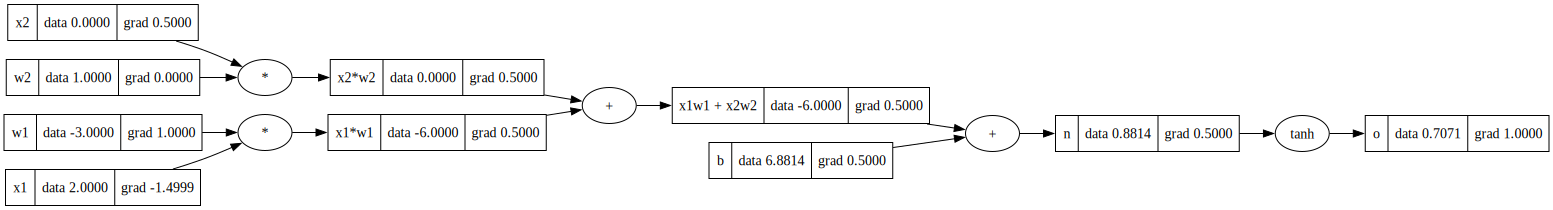

In [24]:
draw_dot(o)

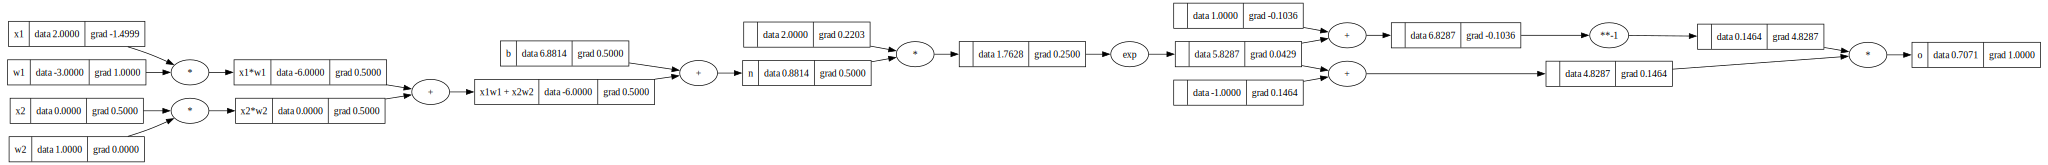

In [25]:
x1 = Atom(2.0, label='x1')
x2 = Atom(0.0, label='x2')
w1 = Atom(-3.0, label='w1')
w2 = Atom(1.0, label='w2')
b = Atom(6.8814, label='b')

x1w1 = x1 * w1
x1w1.label = 'x1*w1'

x2w2 = x2 * w2
x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label = 'x1w1 + x2w2'

n = x1w1x2w2 + b
n.label = 'n'

e = (2 * n).exp()
o = (e - 1) / (e + 1)
o.label = 'o'
o.backward()
draw_dot(o)

In [26]:
n = MLP(3, [4,4,1])
ex = [
	[2.0, 3.0, -1.0], 
	[3.0, -1.0, 0.5],
	[0.5, 1.0, 1.0], 
	[1.0, 1.0, -1.0]
]
targets = [1.0, -1.0, -1.0, 1.0]

In [27]:
lr = 0.1
for k in range(50):
	# forward pass
	preds = [n(x) for x in ex]
	loss = sum([(yout - ygt)**2 for ygt, yout in zip(targets, preds)])
	
	# backward pass
	for p in n.parameters():
		p.grad = 0.0
	loss.backward()
	
	# update
	for p in n.parameters():
		p.data += -lr * p.grad
	print(f'Epoch: {k}, Loss: {loss.data}')

Epoch: 0, Loss: 6.9078703411447115
Epoch: 1, Loss: 5.3274093977759645
Epoch: 2, Loss: 1.9694345549961687
Epoch: 3, Loss: 0.5679653677866334
Epoch: 4, Loss: 0.22954320654311633
Epoch: 5, Loss: 0.1368631286837671
Epoch: 6, Loss: 0.09607283309725409
Epoch: 7, Loss: 0.07341765445290498
Epoch: 8, Loss: 0.05911228134517414
Epoch: 9, Loss: 0.049306577121803724
Epoch: 10, Loss: 0.042189892266849036
Epoch: 11, Loss: 0.036802660726969735
Epoch: 12, Loss: 0.03259058438751734
Epoch: 13, Loss: 0.029211872724503873
Epoch: 14, Loss: 0.026444692803175393
Epoch: 15, Loss: 0.024138994066106173
Epoch: 16, Loss: 0.02218976437047012
Epoch: 17, Loss: 0.020521381893965674
Epoch: 18, Loss: 0.019078049360452126
Epoch: 19, Loss: 0.0178177254944706
Epoch: 20, Loss: 0.01670815064451831
Epoch: 21, Loss: 0.015724171022956396
Epoch: 22, Loss: 0.014845893113347948
Epoch: 23, Loss: 0.014057383161398467
Epoch: 24, Loss: 0.013345733144527173
Epoch: 25, Loss: 0.012700378401568884
Epoch: 26, Loss: 0.01211259138868337
Epoc

In [28]:
preds

[Atom(data=0.9689888844509253),
 Atom(data=-0.9626641538429802),
 Atom(data=-0.9641879525600605),
 Atom(data=0.9537357827603808)]